- 拟合maxwell模型 saos

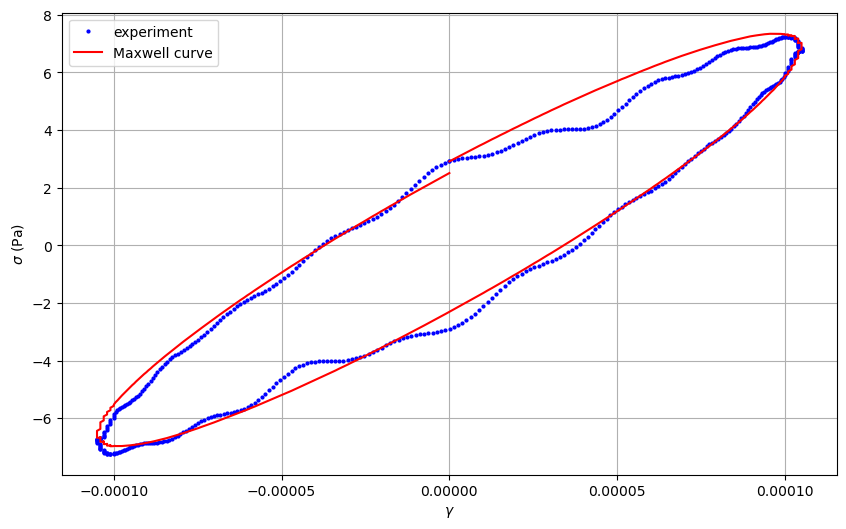

拟合参数结果：
弹性模量 E = 7.17e+04 Pa
粘度系数 η = 3.01e+01 Pa·s
特征时间 λ = 4.20e-04 s


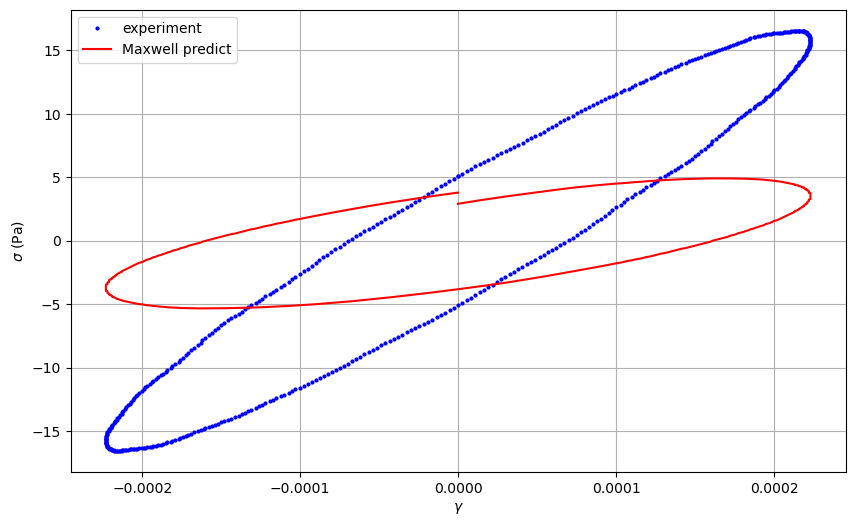


Sheet new数据:
时间范围: 0.0 至 189.5 秒
应变范围: -1.52e-07 至 -1.52e-07
实际应力范围: -16.548 至 16.548 Pa
预测应力范围: -5.332863180826062 至 4.9135170632230265 Pa


In [9]:
import pandas as pd

# 读取Excel文件中的第一个sheet
df = pd.read_excel('data/sx_real_data.xlsx', sheet_name=0)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 提取所需列并转换为numpy数组
gamma = df['gamma'].values
sigma = df['sigma'].values 
time = df['Time'].values

# 定义Maxwell模型的微分方程
def maxwell_model(t, E, eta):
    """
    Maxwell模型的微分方程解
    E: 弹性模量
    eta: 粘度系数
    """
    gamma_dot = np.gradient(gamma, t) # 计算应变率
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程,并设置初始条件
    dt = t[1] - t[0]
    # 设置t=0时的边界条件
    sigma_pred[0] = 2.9097  # 初始应力值
    gamma_0 = 0.0105      # 初始应变值
    
    for i in range(1, len(t)):
        dsigma = (E * gamma_dot[i] - sigma_pred[i-1]/eta) * dt
        sigma_pred[i] = sigma_pred[i-1] + dsigma
        
    return sigma_pred

# 初始参数猜测
E_init = 0.1  # 初始弹性模量
eta_init = 0.1 # 初始粘度系数
p0 = [E_init, eta_init]

# 使用最小二乘法拟合
popt, pcov = curve_fit(maxwell_model, time, sigma, p0=p0)
E_fit, eta_fit = popt

# 计算拟合曲线
sigma_fit = maxwell_model(time, E_fit, eta_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='experiment', markersize=2)
plt.plot(gamma, sigma_fit, 'r-', label='Maxwell curve')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'拟合参数结果：')
print(f'弹性模量 E = {E_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'特征时间 λ = {eta_fit/E_fit:.2e} s')



# 读取sheet_name=new的数据
data_new = pd.read_excel('data/sx_real_data.xlsx', sheet_name=2)
time_new = data_new['Time'].values
gamma_new = data_new['gamma'].values 
sigma_new = data_new['sigma'].values

# 使用已拟合的Maxwell模型预测应力
sigma_pred_new = maxwell_model(time_new, E_fit, eta_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='experiment', markersize=2)
plt.plot(gamma_new, sigma_pred_new, 'r-', label='Maxwell predict')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\nSheet new数据:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_new), "至", max(sigma_pred_new), "Pa")


- 拟合Maxwell模型 LAOs

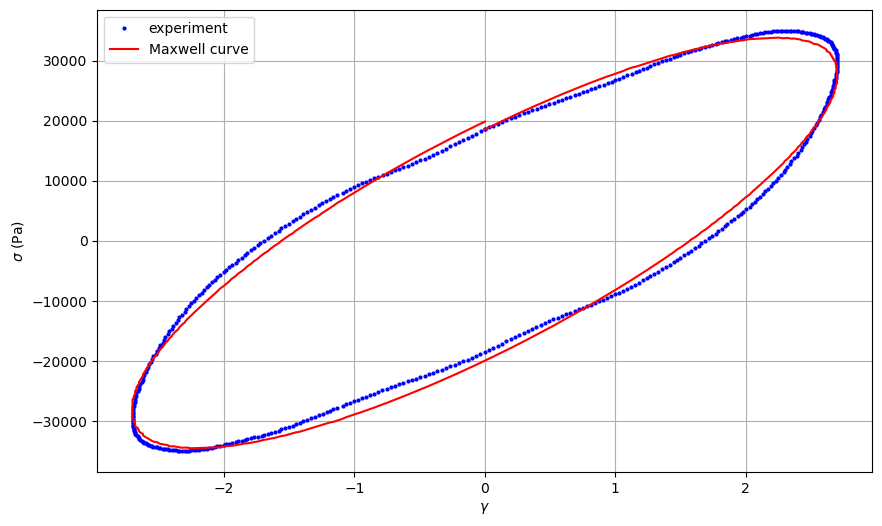

拟合参数结果：
弹性模量 E = 1.55e+04 Pa
粘度系数 η = 3.76e+02 Pa·s
特征时间 λ = 2.44e-02 s


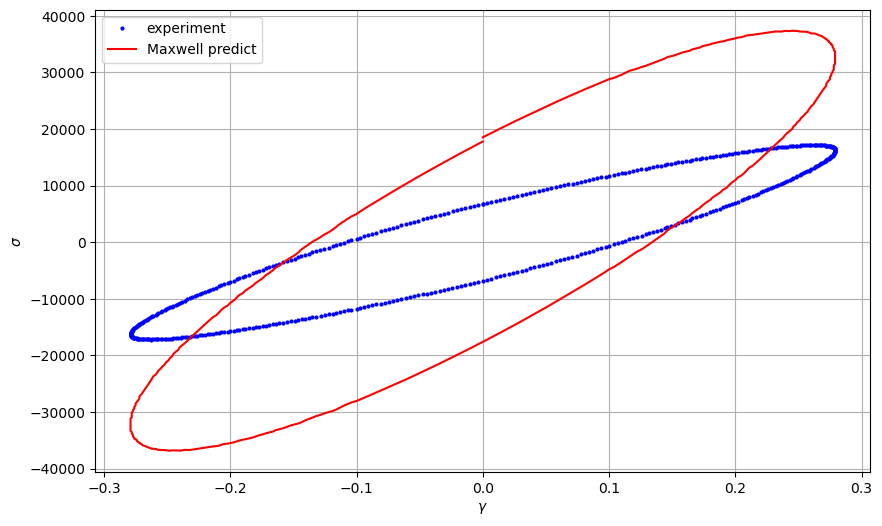


Sheet new数据:
时间范围: 0.0 至 1276.0 秒
应变范围: -1.06e-05 至 -1.06e-05
实际应力范围: -17178.0 至 17178.0 Pa
预测应力范围: -36821.22495753839 至 37357.65467136442 Pa


In [10]:

import pandas as pd

# 读取Excel文件中的第一个sheet
df = pd.read_excel('data/sx_real_data.xlsx', sheet_name=26)
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 提取所需列并转换为numpy数组
gamma = df['gamma'].values
sigma = df['sigma'].values 
time = df['Time'].values

# 定义Maxwell模型的微分方程
def maxwell_model(t, E, eta):
    """
    Maxwell模型的微分方程解
    E: 弹性模量
    eta: 粘度系数
    """
    gamma_dot = np.gradient(gamma, t) # 计算应变率
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程
    dt = t[1] - t[0]
    sigma_pred[0] = E * gamma[0]

    sigma_pred[0] = 18526  # 初始应力值
    for i in range(1, len(t)):
        dsigma = (E * gamma_dot[i] - sigma_pred[i-1]/eta) * dt
        sigma_pred[i] = sigma_pred[i-1] + dsigma
        
    return sigma_pred

# 初始参数猜测
E_init = 10  # 初始弹性模量
eta_init = 9 # 初始粘度系数
p0 = [E_init, eta_init]

# 使用最小二乘法拟合
popt, pcov = curve_fit(maxwell_model, time, sigma, p0=p0)
E_fit, eta_fit = popt

# 计算拟合曲线
sigma_fit = maxwell_model(time, E_fit, eta_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='experiment', markersize=2)
plt.plot(gamma, sigma_fit, 'r-', label='Maxwell curve')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'拟合参数结果：')
print(f'弹性模量 E = {E_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'特征时间 λ = {eta_fit/E_fit:.2e} s')


# 读取sheet_name=new的数据
data_new = pd.read_excel('data/sx_real_data.xlsx', sheet_name=20)
time_new = data_new['Time'].values
gamma_new = data_new['gamma'].values 
sigma_new = data_new['sigma'].values

# 使用已拟合的Maxwell模型预测应力
sigma_pred_new = maxwell_model(time_new, E_fit, eta_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='experiment', markersize=2)
plt.plot(gamma_new, sigma_pred_new, 'r-', label='Maxwell predict')
plt.xlabel('$\gamma$')
plt.ylabel('$\sigma$')
# plt.title('Sheet 26 数据的Maxwell模型预测对比')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\nSheet new数据:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_new), "至", max(sigma_pred_new), "Pa")




- 拟合Giesekus模型

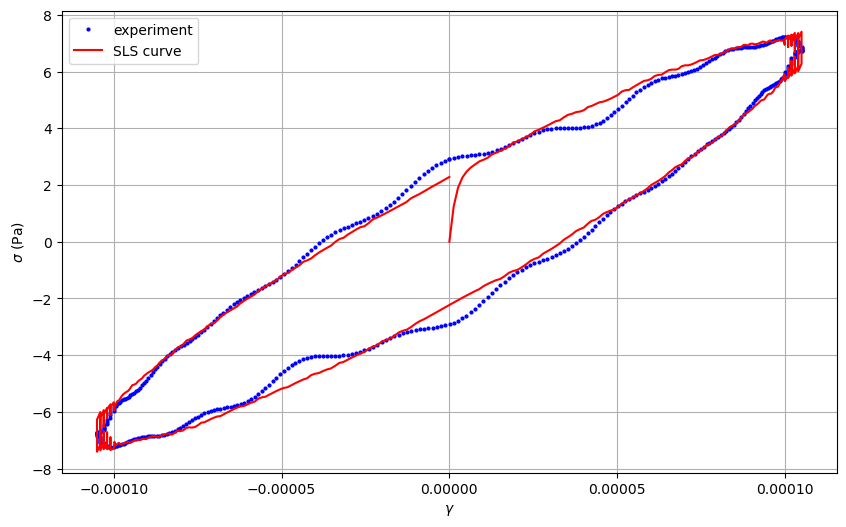

拟合参数结果：
第一个弹簧弹性模量 E1 = 9.36e+05 Pa
第二个弹簧弹性模量 E2 = 6.41e+04 Pa
粘度系数 η = 1.69e+04 Pa·s
特征时间 λ = 1.69e-02 s


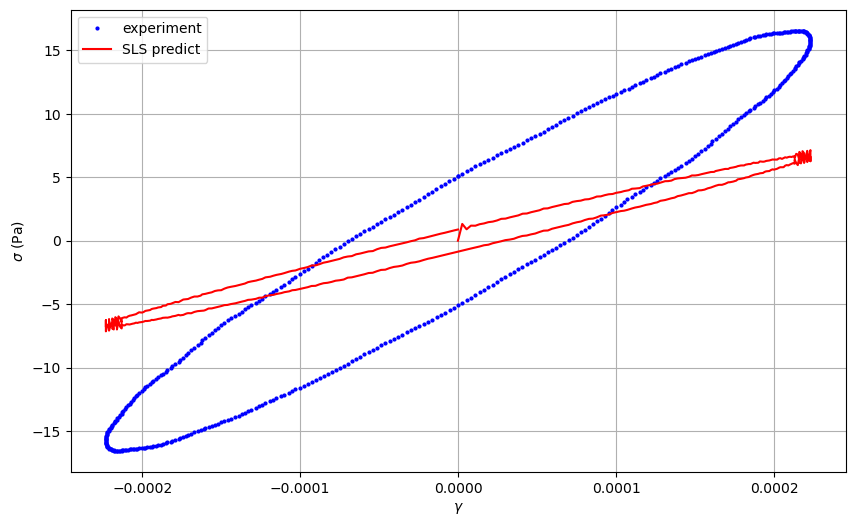


Sheet new数据:
时间范围: 0.0 至 189.5 秒
应变范围: -1.52e-07 至 -1.52e-07
实际应力范围: -16.548 至 16.548 Pa
预测应力范围: -7.139502618576873 至 7.139503901305882 Pa


In [11]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 读取Excel文件中的第一个sheet
df = pd.read_excel('data/sx_real_data.xlsx', sheet_name=0)

# 提取所需列并转换为numpy数组
gamma = df['gamma'].values
sigma = df['sigma'].values 
time = df['Time'].values

# 定义标准线性固体(SLS)模型的微分方程
def sls_model(t, E1, E2, eta):
    """
    标准线性固体(SLS)模型的微分方程解
    E1: 第一个弹簧的弹性模量
    E2: 第二个弹簧的弹性模量
    eta: 粘壶的粘度系数
    """
    gamma_dot = np.gradient(gamma, t)  # 计算应变率
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程
    dt = t[1] - t[0]
    # 设置初始条件
    #sigma_pred[0] = 18526  # 初始应力值
    
    for i in range(1, len(t)):
        # SLS模型的微分方程
        dsigma = (E1 * gamma_dot[i] + (E2 * gamma[i] - sigma_pred[i-1]) * E2/eta) * dt
        sigma_pred[i] = sigma_pred[i-1] + dsigma
        
    return sigma_pred

# 初始参数猜测
E1_init = 0.11  # 第一个弹簧的初始弹性模量
E2_init = 0.1  # 第二个弹簧的初始弹性模量
eta_init = 0.1 # 初始粘度系数
p0 = [E1_init, E2_init, eta_init]

# 使用最小二乘法拟合
popt, pcov = curve_fit(sls_model, time, sigma, p0=p0)
E1_fit, E2_fit, eta_fit = popt

# 计算拟合曲线
sigma_fit = sls_model(time, E1_fit, E2_fit, eta_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='experiment', markersize=2)
plt.plot(gamma, sigma_fit, 'r-', label='SLS curve')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'拟合参数结果：')
print(f'第一个弹簧弹性模量 E1 = {E1_fit:.2e} Pa')
print(f'第二个弹簧弹性模量 E2 = {E2_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'特征时间 λ = {eta_fit/(E1_fit + E2_fit):.2e} s')

# 读取sheet_name=new的数据进行预测
data_new = pd.read_excel('data/sx_real_data.xlsx', sheet_name=2)
time_new = data_new['Time'].values
gamma_new = data_new['gamma'].values 
sigma_new = data_new['sigma'].values

# 使用已拟合的SLS模型预测应力
sigma_pred_new = sls_model(time_new, E1_fit, E2_fit, eta_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='experiment', markersize=2)
plt.plot(gamma_new, sigma_pred_new, 'r-', label='SLS predict')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\nSheet new数据:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_new), "至", max(sigma_pred_new), "Pa")

- 上对流Maxwell模型拟合

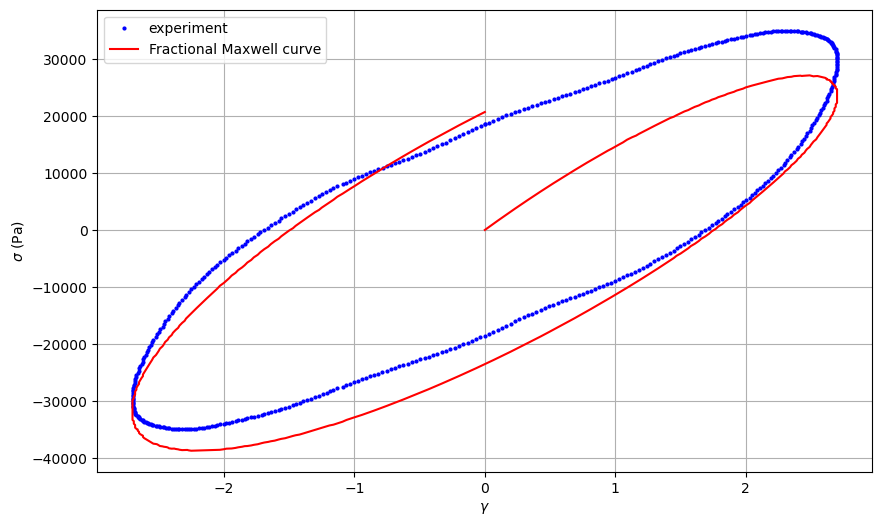

分数阶Maxwell模型拟合参数结果：
弹性模量 G = 1.66e+04 Pa
粘度系数 η = 6.79e+06 Pa·s
分数阶导数阶数 α = 0.9900
特征时间 λ = 4.10e+02 s


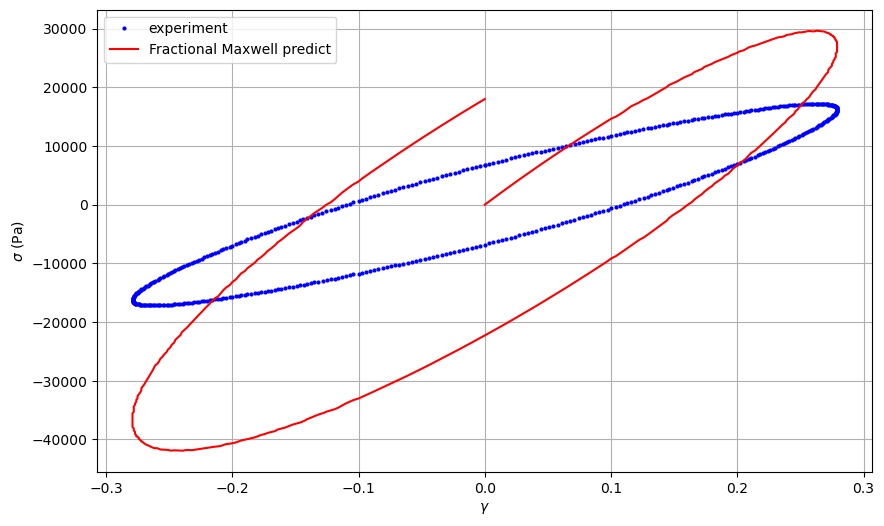


分数阶Maxwell模型预测结果:
时间范围: 0.0 至 1276.0 秒
应变范围: -1.06e-05 至 -1.06e-05
实际应力范围: -17178.0 至 17178.0 Pa
预测应力范围: -41928.16173515421 至 29647.25692154458 Pa


In [12]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.special import gamma as gamma_func

# 读取Excel文件中的第一个sheet
df = pd.read_excel('data/sx_real_data.xlsx', sheet_name=26)

# 提取所需列并转换为numpy数组
gamma = df['gamma'].values
sigma = df['sigma'].values 
time = df['Time'].values

# 定义分数阶Maxwell模型的微分方程
def fractional_maxwell_model(t, G, eta, alpha):
    """
    分数阶Maxwell模型的微分方程解
    G: 弹簧的弹性模量
    eta: 粘壶的粘度系数
    alpha: 分数阶导数的阶数 (0 < alpha < 1)
    """
    # 使用更稳定的方法计算应变率
    gamma_dot = np.zeros_like(t)
    for i in range(1, len(t)-1):
        gamma_dot[i] = (gamma[i+1] - gamma[i-1]) / (t[i+1] - t[i-1])
    
    # 边界处理
    gamma_dot[0] = (gamma[1] - gamma[0]) / (t[1] - t[0])
    gamma_dot[-1] = (gamma[-1] - gamma[-2]) / (t[-1] - t[-2])
    
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程
    dt = t[1] - t[0]
    
    # 简化模型，避免数值不稳定性
    tau = eta / G  # 特征时间
    
    for i in range(1, len(t)):
        # 简化的分数阶Maxwell模型方程
        relaxation_term = (dt/tau)**alpha
        if relaxation_term > 1.0:  # 防止数值不稳定
            relaxation_term = 1.0
            
        sigma_pred[i] = sigma_pred[i-1] * (1 - relaxation_term) + G * gamma_dot[i] * dt
        
        # 确保数值稳定性
        if not np.isfinite(sigma_pred[i]):
            sigma_pred[i] = sigma_pred[i-1]
    
    return sigma_pred

# 初始参数猜测
G_init = 1e3  # 弹簧的初始弹性模量
eta_init = 1e4  # 初始粘度系数
alpha_init = 0.1  # 初始分数阶导数阶数
p0 = [G_init, eta_init, alpha_init]

# 使用最小二乘法拟合，添加边界约束和更多选项以提高稳定性
try:
    popt, pcov = curve_fit(
        fractional_maxwell_model, 
        time, 
        sigma, 
        p0=p0, 
        bounds=([1e-3, 1e-3, 0.01], [1e6, 1e8, 0.99]),
        method='trf',
        max_nfev=10000,
        ftol=1e-6
    )
    G_fit, eta_fit, alpha_fit = popt
except Exception as e:
    print(f"拟合过程中出现错误: {e}")
    # 如果拟合失败，使用初始猜测值
    G_fit, eta_fit, alpha_fit = G_init, eta_init, alpha_init

# 计算拟合曲线
sigma_fit = fractional_maxwell_model(time, G_fit, eta_fit, alpha_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='experiment', markersize=2)
plt.plot(gamma, sigma_fit, 'r-', label='Fractional Maxwell curve')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'分数阶Maxwell模型拟合参数结果：')
print(f'弹性模量 G = {G_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'分数阶导数阶数 α = {alpha_fit:.4f}')
print(f'特征时间 λ = {eta_fit/G_fit:.2e} s')

# 读取sheet_name=new的数据进行预测
data_new = pd.read_excel('data/sx_real_data.xlsx', sheet_name=20)
time_new = data_new['Time'].values
gamma_new = data_new['gamma'].values 
sigma_new = data_new['sigma'].values

# 使用已拟合的分数阶Maxwell模型预测应力
sigma_pred_new = fractional_maxwell_model(time_new, G_fit, eta_fit, alpha_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='experiment', markersize=2)
plt.plot(gamma_new, sigma_pred_new, 'r-', label='Fractional Maxwell predict')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\n分数阶Maxwell模型预测结果:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_new), "至", max(sigma_pred_new), "Pa")




- 分数阶标准线性固体模型拟合

/home/redfu/anaconda3/envs/PINN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 23454 (\N{CJK UNIFIED IDEOGRAPH-5B9E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/redfu/anaconda3/envs/PINN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/redfu/anaconda3/envs/PINN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/redfu/anaconda3/envs/PINN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25454 (\N{CJK UNIFIED IDEOGRAPH-636E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/redfu/anaconda3/envs/PINN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: User

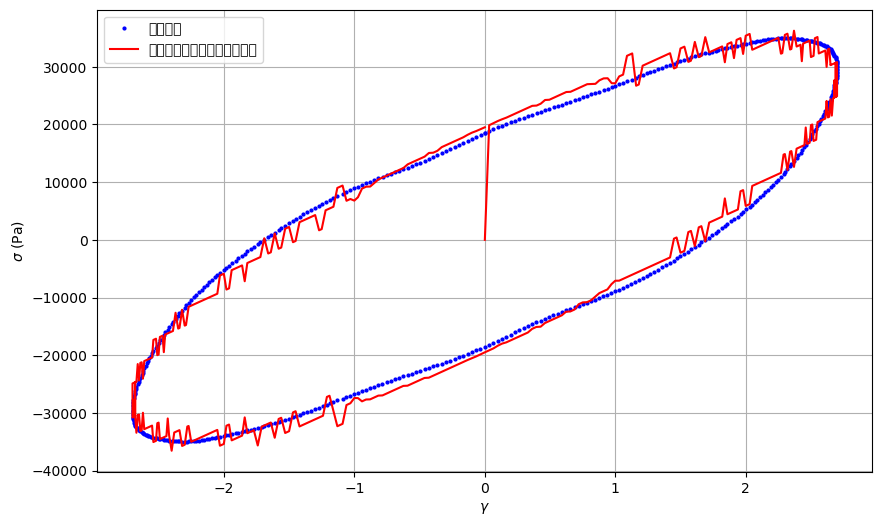

/home/redfu/anaconda3/envs/PINN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 39044 (\N{CJK UNIFIED IDEOGRAPH-9884}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/redfu/anaconda3/envs/PINN/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


分数阶标准线性固体模型拟合参数结果：
第一个弹簧的弹性模量 G0 = 1.03e+04 Pa
第二个弹簧的弹性模量 G1 = 5.90e+05 Pa
粘度系数 η = 2.50e+04 Pa·s
分数阶导数阶数 α = 0.7063
特征时间 λ = 4.24e-02 s


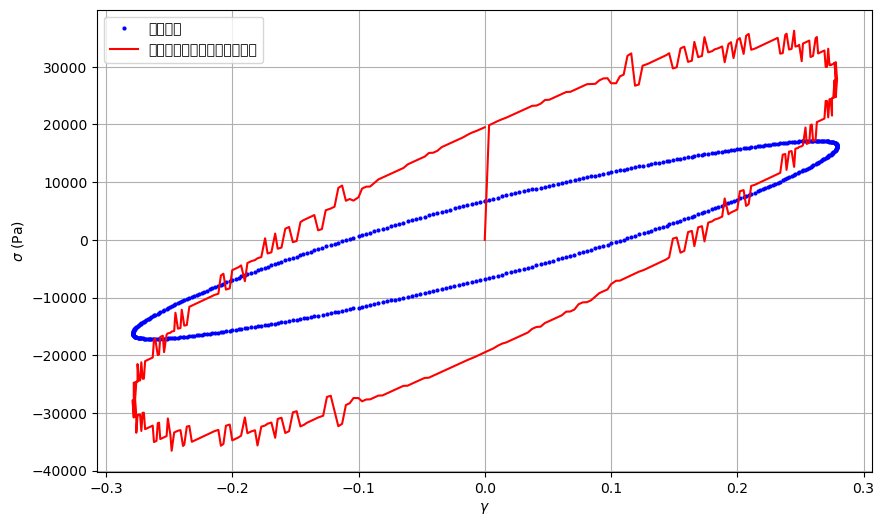


分数阶标准线性固体模型预测结果:
时间范围: 0.0 至 1276.0 秒
应变范围: -1.06e-05 至 -1.06e-05
实际应力范围: -17178.0 至 17178.0 Pa
预测应力范围: -36559.101167497625 至 36249.64395521094 Pa


In [13]:
# 定义分数阶标准线性固体模型的微分方程
def fractional_standard_linear_solid_model(t, G0, G1, eta, alpha):
    """
    分数阶标准线性固体模型的微分方程解
    G0: 第一个弹簧的弹性模量
    G1: 第二个弹簧的弹性模量
    eta: 粘壶的粘度系数
    alpha: 分数阶导数的阶数 (0 < alpha < 1)
    """
    # 计算应变率
    gamma_dot = np.zeros_like(t)
    for i in range(1, len(t)-1):
        gamma_dot[i] = (gamma[i+1] - gamma[i-1]) / (t[i+1] - t[i-1])
    
    # 边界处理
    gamma_dot[0] = (gamma[1] - gamma[0]) / (t[1] - t[0])
    gamma_dot[-1] = (gamma[-1] - gamma[-2]) / (t[-1] - t[-2])
    
    sigma_pred = np.zeros_like(t)
    
    # 使用差分方法求解微分方程
    dt = t[1] - t[0]
    
    # 特征时间
    tau = eta / G1
    
    for i in range(1, len(t)):
        # 分数阶标准线性固体模型方程
        relaxation_term = (dt/tau)**alpha
        if relaxation_term > 1.0:  # 防止数值不稳定
            relaxation_term = 1.0
            
        # 即时弹性响应 + 粘弹性响应
        sigma_pred[i] = G0 * gamma[i] + sigma_pred[i-1] * (1 - relaxation_term) + G1 * gamma_dot[i] * dt
        
        # 确保数值稳定性
        if not np.isfinite(sigma_pred[i]):
            sigma_pred[i] = sigma_pred[i-1]
    
    return sigma_pred

# 初始参数猜测
G0_init = 1e3  # 第一个弹簧的初始弹性模量
G1_init = 1e3  # 第二个弹簧的初始弹性模量
eta_init = 1e4  # 初始粘度系数
alpha_init = 0.5  # 初始分数阶导数阶数
p0 = [G0_init, G1_init, eta_init, alpha_init]

# 使用最小二乘法拟合，添加边界约束和更多选项以提高稳定性
try:
    popt, pcov = curve_fit(
        fractional_standard_linear_solid_model, 
        time, 
        sigma, 
        p0=p0, 
        bounds=([1e-3, 1e-3, 1e-3, 0.01], [1e6, 1e6, 1e8, 0.99]),
        method='trf',
        max_nfev=10000,
        ftol=1e-6
    )
    G0_fit, G1_fit, eta_fit, alpha_fit = popt
except Exception as e:
    print(f"拟合过程中出现错误: {e}")
    # 如果拟合失败，使用初始猜测值
    G0_fit, G1_fit, eta_fit, alpha_fit = G0_init, G1_init, eta_init, alpha_init

# 计算拟合曲线
sigma_fit_sls = fractional_standard_linear_solid_model(time, G0_fit, G1_fit, eta_fit, alpha_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='实验数据', markersize=2)
plt.plot(gamma, sigma_fit_sls, 'r-', label='分数阶标准线性固体模型拟合')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 打印拟合参数
print(f'分数阶标准线性固体模型拟合参数结果：')
print(f'第一个弹簧的弹性模量 G0 = {G0_fit:.2e} Pa')
print(f'第二个弹簧的弹性模量 G1 = {G1_fit:.2e} Pa')
print(f'粘度系数 η = {eta_fit:.2e} Pa·s')
print(f'分数阶导数阶数 α = {alpha_fit:.4f}')
print(f'特征时间 λ = {eta_fit/G1_fit:.2e} s')

# 使用已拟合的分数阶标准线性固体模型预测应力
sigma_pred_sls_new = fractional_standard_linear_solid_model(time_new, G0_fit, G1_fit, eta_fit, alpha_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='实验数据', markersize=2)
plt.plot(gamma_new, sigma_pred_sls_new, 'r-', label='分数阶标准线性固体模型预测')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.show()

# 输出数据
print("\n分数阶标准线性固体模型预测结果:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_sls_new), "至", max(sigma_pred_sls_new), "Pa")


- Giesekus模型拟合

In [ ]:
# 导入必要的库
from scipy.optimize import minimize
import numpy as np

# 定义K-BKZ模型函数
def k_bkz_model(time, G_0, tau, alpha, beta):
    """
    K-BKZ模型 - 稳定版本
    
    参数:
    time: 时间数组
    G_0: 初始模量
    tau: 特征松弛时间
    alpha: 非线性参数 (控制应变硬化/软化)
    beta: 记忆函数衰减参数
    
    返回:
    sigma: 应力数组
    """
    # 防止参数出现不合理值
    G_0 = max(1e-10, G_0)
    tau = max(1e-10, tau)
    alpha = max(0.01, alpha)
    beta = max(0.01, beta)
    
    sigma = np.zeros_like(time)
    dt = time[1] - time[0]
    
    # 计算应变
    gamma_array = gamma
    
    # 使用改进的数值方法求解K-BKZ模型
    for i in range(1, len(time)):
        # 初始化当前时刻的应力
        stress_sum = 0
        
        # 积分计算历史应变对当前应力的贡献
        for j in range(i):
            # 计算时间差
            t_diff = time[i] - time[j]
            
            # 记忆函数 (指数衰减)
            memory = np.exp(-t_diff / tau)
            
            # 计算应变差
            if j < len(gamma_array) - 1:
                gamma_diff = gamma_array[j+1] - gamma_array[j]
            else:
                gamma_diff = 0
                
            # 非线性应变函数
            strain_function = np.exp(-alpha * abs(gamma_array[i] - gamma_array[j])**beta)
            
            # 累加贡献
            if j < i:  # 确保只考虑过去的时间点
                stress_sum += G_0 * memory * strain_function * gamma_diff
        
        sigma[i] = stress_sum
    
    return sigma

# 定义目标函数 - 使用对数尺度的均方误差以提高稳定性
def objective_k_bkz(params, time, sigma_exp):
    G_0, tau, alpha, beta = params
    
    # 检查参数是否在合理范围内
    if G_0 <= 0 or tau <= 0 or alpha <= 0 or beta <= 0:
        return 1e12  # 返回一个很大的值作为惩罚
    
    try:
        sigma_model = k_bkz_model(time, G_0, tau, alpha, beta)
        
        # 过滤掉无效值
        valid_indices = np.isfinite(sigma_model) & np.isfinite(sigma_exp)
        if np.sum(valid_indices) < len(sigma_exp) * 0.5:  # 如果有效数据点太少
            return 1e12
        
        # 使用相对误差而不是绝对误差
        error = np.sum(((sigma_model[valid_indices] - sigma_exp[valid_indices]) / 
                        (np.abs(sigma_exp[valid_indices]) + 1e-10))**2)
        
        # 添加正则化项以避免极端参数值
        regularization = 0.01 * (np.log(G_0/1e3)**2 + np.log(tau)**2 + np.log(alpha+0.1)**2 + np.log(beta+0.1)**2)
        
        return error + regularization
    except:
        return 1e12  # 出现任何异常返回大值

# 多次尝试不同的初始值以找到全局最优解
best_result = None
best_error = float('inf')

# 尝试不同的初始猜测值
initial_guesses = [
    [1e2, 0.1, 0.5, 0.5],
    [1e3, 1.0, 1.0, 1.0],
    [1e4, 10.0, 2.0, 1.5],
    [5e2, 0.5, 0.8, 0.8],
    [5e3, 5.0, 1.5, 1.2]
]

# 参数边界
bounds = [(1e0, 1e5), (1e-3, 1e2), (0.01, 10.0), (0.01, 5.0)]

for guess in initial_guesses:
    try:
        # 使用不同的优化算法
        result = minimize(objective_k_bkz, guess, args=(time, sigma), 
                          method='L-BFGS-B', bounds=bounds, 
                          options={'maxiter': 100, 'disp': False})
        
        # 检查结果是否比之前的更好
        if result.fun < best_error:
            best_error = result.fun
            best_result = result
    except:
        continue

# 如果所有尝试都失败，使用默认值
if best_result is None:
    G_0_fit, tau_fit, alpha_fit, beta_fit = 1e3, 1.0, 1.0, 1.0
    print("警告：拟合失败，使用默认参数值")
else:
    # 获取拟合参数
    G_0_fit, tau_fit, alpha_fit, beta_fit = best_result.x

# 使用拟合参数计算模型预测值
sigma_fit_kbkz = k_bkz_model(time, G_0_fit, tau_fit, alpha_fit, beta_fit)

# 绘制结果
plt.figure(figsize=(10, 6))
plt.plot(gamma, sigma, 'bo', label='实验数据', markersize=2)
plt.plot(gamma, sigma_fit_kbkz, 'r-', label='K-BKZ模型拟合')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.title('K-BKZ模型拟合结果')
plt.show()

# 打印拟合参数
print(f'K-BKZ模型拟合参数结果：')
print(f'初始模量 G_0 = {G_0_fit:.2e} Pa')
print(f'特征松弛时间 τ = {tau_fit:.2e} s')
print(f'非线性参数 α = {alpha_fit:.4f}')
print(f'记忆函数衰减参数 β = {beta_fit:.4f}')

# 使用已拟合的K-BKZ模型预测应力
sigma_pred_kbkz = k_bkz_model(time_new, G_0_fit, tau_fit, alpha_fit, beta_fit)

# 绘制对比图
plt.figure(figsize=(10, 6))
plt.plot(gamma_new, sigma_new, 'bo', label='实验数据', markersize=2)
plt.plot(gamma_new, sigma_pred_kbkz, 'r-', label='K-BKZ模型预测')
plt.xlabel('$\\gamma$')
plt.ylabel('$\\sigma$ (Pa)')
plt.legend()
plt.grid(True)
plt.title('K-BKZ模型预测结果')
plt.show()

# 输出数据
print("\nK-BKZ模型预测结果:")
print("时间范围:", time_new[0], "至", time_new[-1], "秒")
print("应变范围:", gamma_new[0], "至", gamma_new[-1])
print("实际应力范围:", min(sigma_new), "至", max(sigma_new), "Pa")
print("预测应力范围:", min(sigma_pred_kbkz), "至", max(sigma_pred_kbkz), "Pa")




